# Explanatory models of 10 Year Treasury Notes (1992-2021)

#### <font color='darkblue'>__1. Data and libaries import__</font> [(→ Link)](#data_import)
#### <font color='darkblue'>__2. Classification data preperation__</font> [(→ Link)](#preperation)
2.1 Adding new columns<br>
#### <font color='darkblue'>__3. Classification models with features from Filter Method__</font> [(→ Link)](#classification_fm)
##### <font color='black'>3.1 Logistic Regression
3.1.1 Logistic Regression with solver liblinear<br>
3.1.2 Logistic Regression with cross validation<br>
3.1.3 Feature importance<br>
##### <font color='black'>3.2 Random Forest
3.2.1 Random Forest with depth 100<br>
3.2.2 Random Forest depth 500<br>
3.2.3 Random Forest depth 1000<br>
3.2.4 Feature importance<br>
##### <font color='black'>3.3 Neural Network
##### <font color='black'>3.4 XGBoost
3.4.1 XGBoost with 10 boosting rounds<br>
3.4.2 XGBoost with 50 boosting rounds<br>
3.4.3 XGBoost with 100 boosting rounds<br>
3.4.4 Feature importance<br>
##### <font color='black'>3.5 Pipeline
#### <font color='darkblue'>__4. Classification models with all the features__</font> [(→ Link)](#classification_all)
##### <font color='black'>4.1 Logistic Regression
4.1.1 Logistic Regression with solver liblinear<br>
4.1.2 Logistic Regression with cross validation<br>
4.1.3 Feature importance<br>
##### <font color='black'>4.2 Random Forest
4.2.1 Random Forest with depth 100<br>
4.2.2 Random Forest depth 500<br>
4.2.3 Random Forest depth 1000<br>
4.2.4 Feature importance<br>
##### <font color='black'>4.3 Neural Network
##### <font color='black'>4.4 XGBoost
4.4.1 XGBoost with 10 boosting rounds<br>
4.4.2 XGBoost with 50 boosting rounds<br>
4.4.3 XGBoost with 100 boosting rounds<br>
4.4.4 Feature importance<br>
##### <font color='black'>4.5 Pipeline
<br>

## <a id='data_import'></a>
## 1. Data and libaries import

In [1]:
# Loading libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import warnings  
import pydotplus
import pydot
import xgboost as xgb
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.tree import DecisionTreeRegressor # Decision Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
from matplotlib import pyplot
from cycler import cycler
from scipy.stats.stats import pearsonr
from six import StringIO 
from IPython.display import Image  
from functools import reduce
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
# Import data and create dataframe
df_forecast = pd.read_excel('Prediction_Data_1992-2021.xlsx', index_col=0)
df_forecast

,Yield of the ten-year Treasury Notes,Real Risk Premium,Inflation Risk Premium,National Activity Index,Consumer Sentiment,Labor Force Participation,Unemploymentrate,Borrowings from FED,Reserves Depository Institutions,M2,...,10-Year Expected Inflation,Velocity of M2,GDP,Real GDP,Federal Debt,quarterly_mean,half_year_mean,annual_mean,annual_quarterly_mean,annual_half_mean
Date,,,,,,,,,,,,,,,,,,,,,
1992-12-01,6.77,1.442349,0.546554,0.41,91.0,66.3,7.4,0.1236,56.6,3424.7,...,3.436406,1.964333,4.300000,9851.707667,4.212723e+06,0.984121,0.986706,1.035451,1.052158,1.049401
1993-01-01,6.60,1.363231,0.503369,0.22,89.3,66.2,7.3,0.1655,56.0,3419.1,...,3.329465,1.971000,2.900000,9857.185000,4.230580e+06,1.016288,1.006061,1.056692,1.039756,1.050326
1993-02-01,6.26,1.294959,0.464536,0.11,86.6,66.2,7.1,0.0453,53.9,3414.5,...,3.187282,1.975667,3.533333,9876.311667,4.271037e+06,1.058307,1.051917,1.099707,1.039119,1.045432
1993-03-01,5.98,1.234105,0.446984,-0.47,85.9,66.2,7.0,0.0915,54.3,3411.7,...,3.012067,1.980333,4.166667,9895.438333,4.311493e+06,1.070652,1.088907,1.129459,1.054926,1.037241
1993-04-01,5.97,1.243659,0.441624,0.21,85.6,66.1,7.1,0.0732,56.5,3411.3,...,3.060806,1.985000,4.800000,9914.565000,4.351950e+06,1.038945,1.073423,1.110274,1.068655,1.034330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,1.52,1.146639,0.334032,0.21,85.5,61.6,5.9,87.7460,3848.1,20458.9,...,1.596289,1.115667,10.066667,19442.032000,2.846242e+07,1.050987,0.957237,0.727522,0.692227,0.760023
2021-07-01,1.32,1.156082,0.353131,0.71,81.2,61.7,5.4,87.6211,3943.9,20620.0,...,1.624811,1.114000,8.400000,19478.893000,2.842892e+07,1.155303,1.132576,0.881944,0.763388,0.778707
2021-08-01,1.28,1.106154,0.386107,0.03,70.3,61.7,5.2,80.7667,4140.1,20852.3,...,1.580163,1.118000,10.433333,19588.025333,2.882502e+07,1.121094,1.170573,0.950521,0.847851,0.812013


## <a id='preperation'></a>
## 2 Classification data preperation

In [3]:
# Create dataframe
classification = df_forecast.copy()

In [4]:
# Rename the column
data = classification[["Yield of the ten-year Treasury Notes"]]
data = data.rename(columns = {'Yield of the ten-year Treasury Notes':'Yield'})

# Setup target variable.  This identifies if the price went up or down.
data["Target"] = classification.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Yield of the ten-year Treasury Notes"]

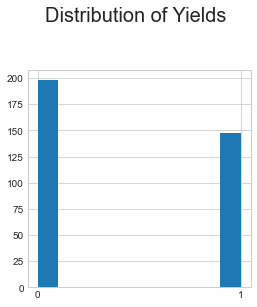

In [5]:
# Visualize the data
fig, ax = plt.subplots(figsize=(4, 4))
fig.suptitle('Distribution of Yields', fontsize=20, y=1.1, ha="center")
plt.hist(data.Target)
ax.xaxis.set_ticks([0,1]) 
plt.show()

In [6]:
# Create training data
x = classification.drop('Yield of the ten-year Treasury Notes',1)
predictors = x

In [7]:
# Merging both dataframes
forecast = [data, predictors]

forecast = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), forecast)

In [8]:
# Dropping first row because of NAN values
forecast = forecast.iloc[1: , :]

## <a id='classification_fm'></a>
## 3 Classification models with features from Filter Method

### Definition of variables, train-test splitting

In [9]:
# Create predictors and target variables
predictors = forecast[['Real Risk Premium',
                       'Labor Force Participation',
                       'Reserves Depository Institutions',  
                       'M2',
                       '1-Month Real Interest',
                       '1-Year Real Interest',
                       '10-Year Real Interest',
                       '1-Year Expected Inflation', 
                       '2-Year Expected Inflation', 
                       '3-Year Expected Inflation', 
                       '4-Year Expected Inflation',
                       '5-Year Expected Inflation',
                       '10-Year Expected Inflation',
                       'Velocity of M2',
                       'Real GDP',
                       'Federal Debt']]
target = forecast['Target']

In [10]:
# Split the dataframes into test and train
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, shuffle=False)

In [11]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 276
Number of test data: 70


### 3.1 Logistic Regression

#### 3.1.1 Logistic Regression with solver liblinear

In [12]:
# Create a Logistic Regression model  
lrl = LogisticRegression(solver='liblinear')
lrl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [13]:
# Evaluate Logistic Regression
pred_train = lrl.predict(X_train)
pred_test = lrl.predict(X_test)

In [14]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.5833
Accuracy score Test: 0.5714
Precision score Test: 0.5758
Recall score Test: 0.5429
F1 Score Test: 0.5588


[[21 16]
 [14 19]]


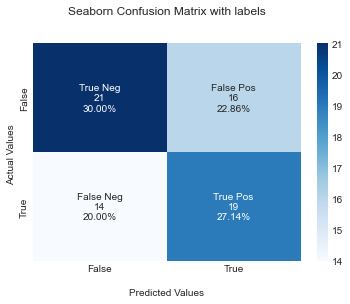

In [15]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.5716625716625716


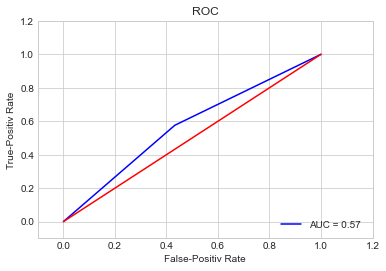

In [16]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
plt.show()

#### 3.1.2 Logistic Regression with cross validation

In [17]:
# Create a Logistic Regression model  
lrcv = LogisticRegressionCV(solver='liblinear')
lrcv.fit(X_train,y_train)

LogisticRegressionCV(solver='liblinear')

In [18]:
# Evaluate Logistic Regression
pred_train = lrcv.predict(X_train)
pred_test = lrcv.predict(X_test)

In [19]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.5833
Accuracy score Test: 0.5714
Precision score Test: 0.5758
Recall score Test: 0.5429
F1 Score Test: 0.5588


[[21 16]
 [14 19]]


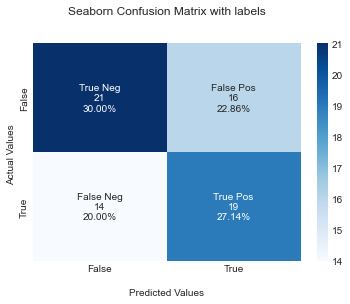

In [20]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.5716625716625716


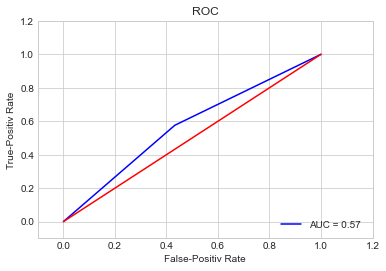

In [21]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 3.1.3 Feature importance

In [22]:
lrl_cv_coef = lrl.coef_[0]

<AxesSubplot:ylabel='features'>

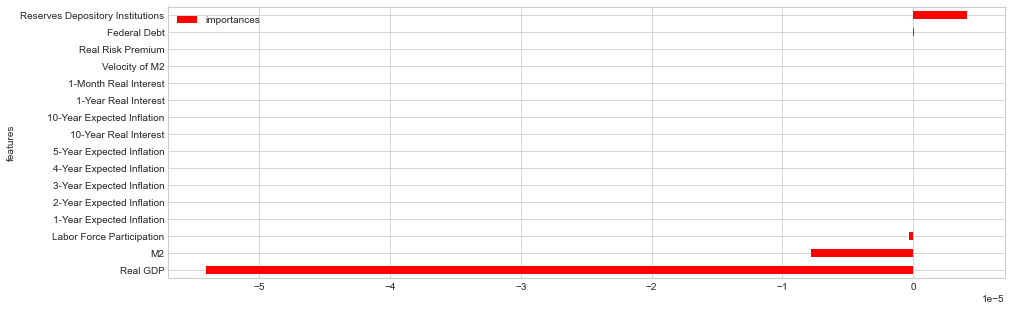

In [23]:
cols = X_train.columns
# Derive feature importance from Logistic Regression solver liblinear
importances = lrl_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

In [24]:
lrcv_cv_coef = lrcv.coef_[0]

<AxesSubplot:ylabel='features'>

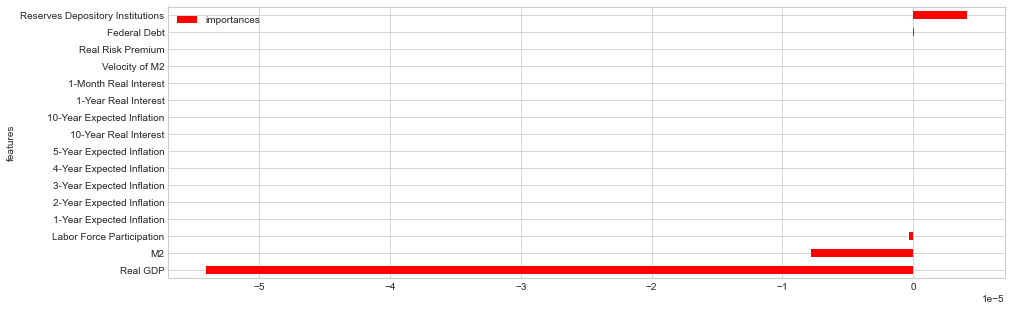

In [25]:
cols = X_train.columns
# Derive feature importance from Logistic Regression cross validation
importances = lrcv_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 3.2 Random Forest

#### 3.2.1 Random Forest with depth 100

In [26]:
# Create a Random Forest model 
rf100 = RandomForestClassifier(max_depth =100)
rf100.fit(X_train,y_train)

RandomForestClassifier(max_depth=100)

In [27]:
# Evaluate Random Forest
pred_train = rf100.predict(X_train)
pred_test = rf100.predict(X_test)

In [28]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.5143
Precision score Test: 0.1515
Recall score Test: 0.4545
F1 Score Test: 0.2273


[[31  6]
 [28  5]]


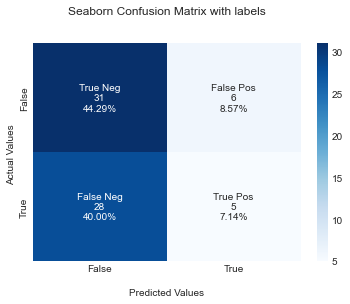

In [29]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.4946764946764947


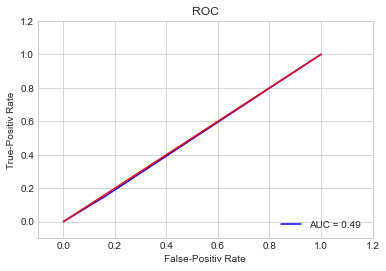

In [30]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 3.2.2 Random Forest depth 500

In [31]:
# Create a Random Forest model  
rf500 = RandomForestClassifier(max_depth =500)
rf500.fit(X_train,y_train)

RandomForestClassifier(max_depth=500)

In [32]:
# Evaluate Random Forest
pred_train = rf500.predict(X_train)
pred_test = rf500.predict(X_test)

In [33]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.5286
Precision score Test: 0.2121
Recall score Test: 0.5
F1 Score Test: 0.2979


[[30  7]
 [26  7]]


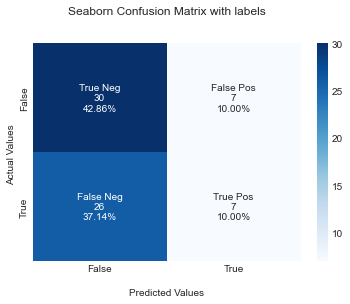

In [34]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.5114660114660114


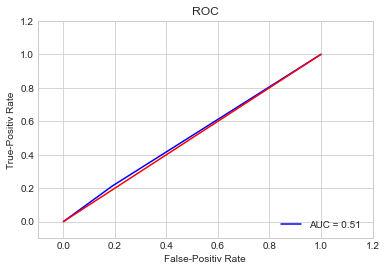

In [35]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 3.2.3 Random Forest depth 1000

In [36]:
# Create a Random Forest model 
rf1000 = RandomForestClassifier(max_depth =1000)
rf1000.fit(X_train,y_train)

RandomForestClassifier(max_depth=1000)

In [37]:
# Evaluate Random Forest
pred_train = rf1000.predict(X_train)
pred_test = rf1000.predict(X_test)

In [38]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.5571
Precision score Test: 0.1818
Recall score Test: 0.6
F1 Score Test: 0.2791


[[33  4]
 [27  6]]


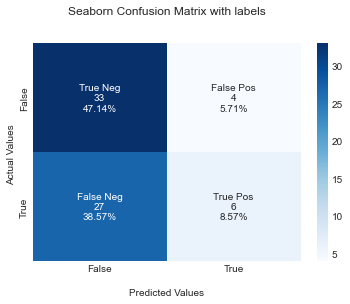

In [39]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.5368550368550369


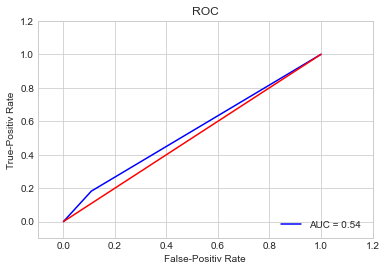

In [40]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 3.2.4 Feature importance

In [41]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

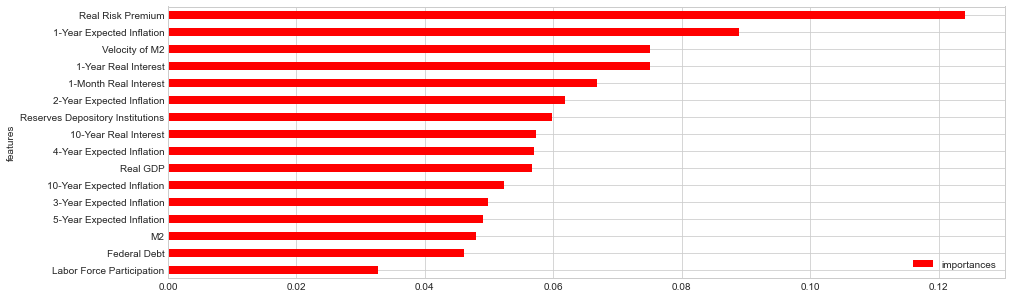

In [42]:
# Derive feature importance from Random Forest with 100 trees
importances = rf100.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf100.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

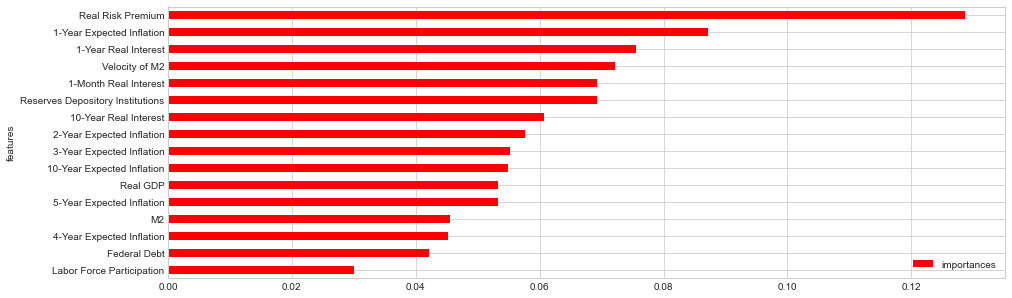

In [43]:
# Derive feature importance from Random Forest with 500 trees
importances = rf500.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf500.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

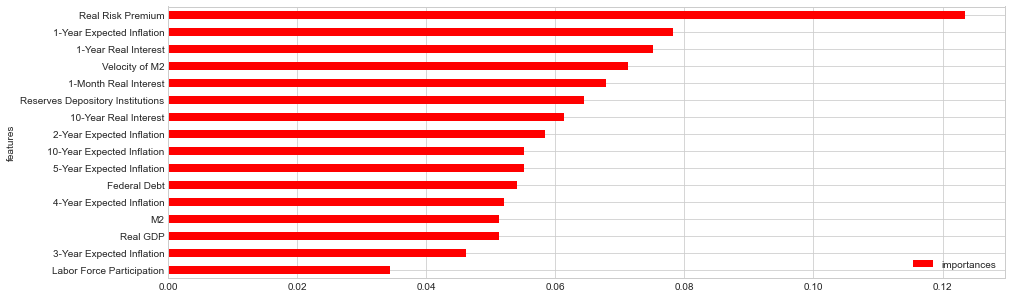

In [44]:
# Derive feature importance from Random Forest with 1000 trees
importances = rf1000.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf1000.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 3.3 Neural Network

In [45]:
# Create Neural Network model
nn = make_pipeline(StandardScaler(), MLPClassifier()) 
nn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier())])

In [46]:
# Evaluate Neural Network
pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

In [47]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.6884
Accuracy score Test: 0.5
Precision score Test: 0.0909
Recall score Test: 0.375
F1 Score Test: 0.1463


[[32  5]
 [30  3]]


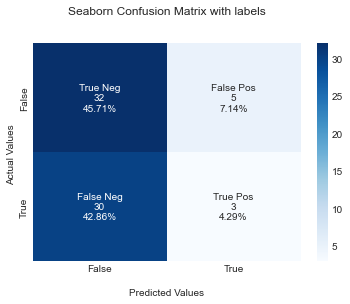

In [48]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.4778869778869779


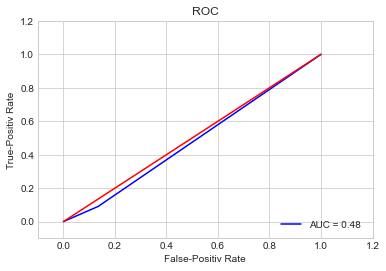

In [49]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

### 3.4 XGBoost

#### 3.4.1 XGBoost with 10 boosting rounds

In [50]:
# Create XGBoost model
XGB10 = xgb.XGBClassifier(n_estimators=10)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
XGB10.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = XGB10.evals_result()

[0]	validation_0-error:0.18116	validation_1-error:0.44286
[1]	validation_0-error:0.14130	validation_1-error:0.48571
[2]	validation_0-error:0.11957	validation_1-error:0.41429
[3]	validation_0-error:0.08696	validation_1-error:0.42857
[4]	validation_0-error:0.07971	validation_1-error:0.44286
[5]	validation_0-error:0.07246	validation_1-error:0.44286
[6]	validation_0-error:0.05435	validation_1-error:0.45714
[7]	validation_0-error:0.03623	validation_1-error:0.48571
[8]	validation_0-error:0.03261	validation_1-error:0.48571
[9]	validation_0-error:0.02899	validation_1-error:0.48571


In [51]:
# Evaluate XGBoost
pred_train = XGB10.predict(X_train)
pred_test = XGB10.predict(X_test)

In [52]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.971
Accuracy score Test: 0.5143
Precision score Test: 0.2727
Recall score Test: 0.4737
F1 Score Test: 0.3462


[[27 10]
 [24  9]]


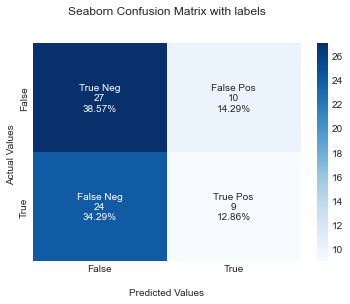

In [53]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.5012285012285013


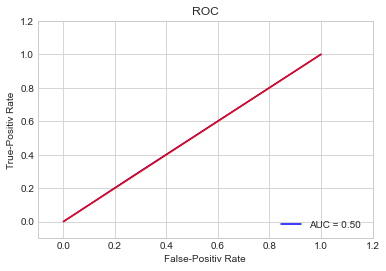

In [54]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 3.4.2 XGBoost with 50 boosting rounds

In [55]:
# Create XGBoost model
XGB50 = xgb.XGBClassifier(n_estimators=50)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
XGB50.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = XGB50.evals_result()

[0]	validation_0-error:0.18116	validation_1-error:0.44286
[1]	validation_0-error:0.14130	validation_1-error:0.48571
[2]	validation_0-error:0.11957	validation_1-error:0.41429
[3]	validation_0-error:0.08696	validation_1-error:0.42857
[4]	validation_0-error:0.07971	validation_1-error:0.44286
[5]	validation_0-error:0.07246	validation_1-error:0.44286
[6]	validation_0-error:0.05435	validation_1-error:0.45714
[7]	validation_0-error:0.03623	validation_1-error:0.48571
[8]	validation_0-error:0.03261	validation_1-error:0.48571
[9]	validation_0-error:0.02899	validation_1-error:0.48571
[10]	validation_0-error:0.02174	validation_1-error:0.48571
[11]	validation_0-error:0.02174	validation_1-error:0.51429
[12]	validation_0-error:0.01449	validation_1-error:0.51429
[13]	validation_0-error:0.01087	validation_1-error:0.51429
[14]	validation_0-error:0.00725	validation_1-error:0.51429
[15]	validation_0-error:0.00362	validation_1-error:0.51429
[16]	validation_0-error:0.00362	validation_1-error:0.52857
[17]	va

In [56]:
# Evaluate XGBoost
pred_train = XGB50.predict(X_train)
pred_test = XGB50.predict(X_test)

In [57]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.5
Precision score Test: 0.1515
Recall score Test: 0.4167
F1 Score Test: 0.2222


[[30  7]
 [28  5]]


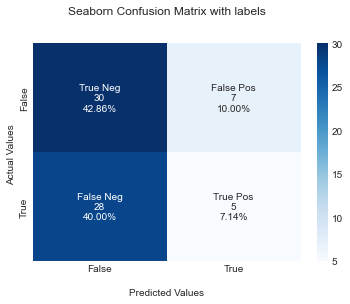

In [58]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.4811629811629811


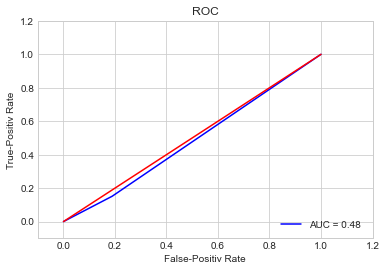

In [59]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 3.4.3 XGBoost with 100 boosting rounds

In [60]:
# Create XGBoost model
XGB100 = xgb.XGBClassifier(n_estimators=100)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
XGB100.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = XGB100.evals_result()

[0]	validation_0-error:0.18116	validation_1-error:0.44286
[1]	validation_0-error:0.14130	validation_1-error:0.48571
[2]	validation_0-error:0.11957	validation_1-error:0.41429
[3]	validation_0-error:0.08696	validation_1-error:0.42857
[4]	validation_0-error:0.07971	validation_1-error:0.44286
[5]	validation_0-error:0.07246	validation_1-error:0.44286
[6]	validation_0-error:0.05435	validation_1-error:0.45714
[7]	validation_0-error:0.03623	validation_1-error:0.48571
[8]	validation_0-error:0.03261	validation_1-error:0.48571
[9]	validation_0-error:0.02899	validation_1-error:0.48571
[10]	validation_0-error:0.02174	validation_1-error:0.48571
[11]	validation_0-error:0.02174	validation_1-error:0.51429
[12]	validation_0-error:0.01449	validation_1-error:0.51429
[13]	validation_0-error:0.01087	validation_1-error:0.51429
[14]	validation_0-error:0.00725	validation_1-error:0.51429
[15]	validation_0-error:0.00362	validation_1-error:0.51429
[16]	validation_0-error:0.00362	validation_1-error:0.52857
[17]	va

In [61]:
# Evaluate XGBoost
pred_train = XGB100.predict(X_train)
pred_test = XGB100.predict(X_test)

In [62]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.5143
Precision score Test: 0.1818
Recall score Test: 0.4615
F1 Score Test: 0.2609


[[30  7]
 [27  6]]


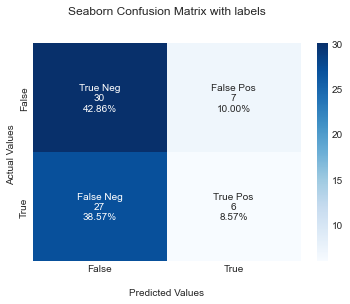

In [63]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.49631449631449626


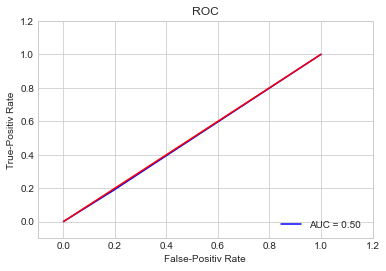

In [64]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 3.4.4 Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

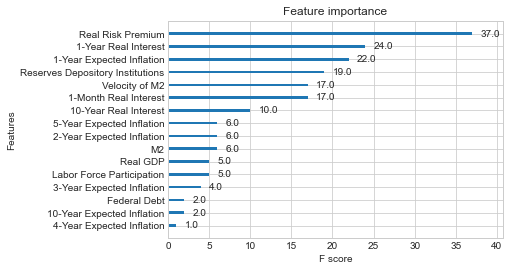

In [65]:
# Derive feature importance from XGBoost wit 10 boosting rounds
xgb.plot_importance(XGB10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

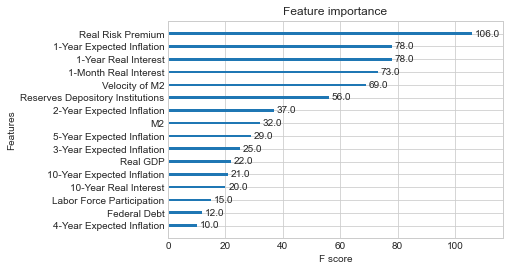

In [66]:
# Derive feature importance from XGBoost wit 50 boosting rounds
xgb.plot_importance(XGB50)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

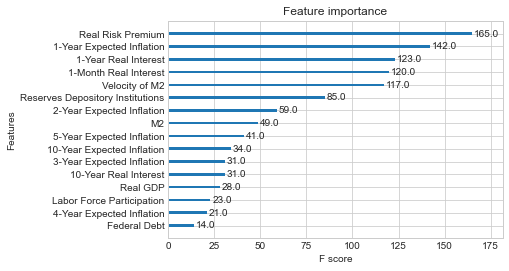

In [67]:
# Derive feature importance from XGBoost wit 100 boosting rounds
xgb.plot_importance(XGB100)

### 3.5 Pipeline

In [68]:
# Name of all the models
models = [
    ('Logistic Regression, solver = liblinear', lrl),
    ('Logistic Regression CV, solver = liblinear', lrcv),
    ('Random Forest, depth = 100', rf100),
    ('Random Forest, depth = 500', rf500),
    ('Random Forest, depth = 1000', rf1000),
    ('Neural Network', nn),
    ('XGBoost, boosting rounds = 10', XGB10),
    ('XGBoost, boosting rounds = 50', XGB50),
    ('XGBoost, boosting rounds = 100', XGB100),]

In [69]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    Precision = precision_score(y_test, y_hat)
    Recall = recall_score(y_test, y_hat)
    F1 = f1_score(y_test, y_hat)
    train = pipelined_model.score(X_train, y_train)
    test = pipelined_model.score(X_test, y_test)
    print('Model: ', name, ' | Train: ', train)
    print('Model: ', name, ' | Test: ', test)
    print('Model: ', name, ' | Precision: ', Precision)
    print('Model: ', name, ' | Recall: ', Recall)
    print('Model: ', name, ' | F1: ', F1)
    print('----------------')

Model:  Logistic Regression, solver = liblinear  | Train:  0.5833333333333334
Model:  Logistic Regression, solver = liblinear  | Test:  0.5714285714285714
Model:  Logistic Regression, solver = liblinear  | Precision:  0.5428571428571428
Model:  Logistic Regression, solver = liblinear  | Recall:  0.5757575757575758
Model:  Logistic Regression, solver = liblinear  | F1:  0.5588235294117646
----------------
Model:  Logistic Regression CV, solver = liblinear  | Train:  0.5833333333333334
Model:  Logistic Regression CV, solver = liblinear  | Test:  0.5714285714285714
Model:  Logistic Regression CV, solver = liblinear  | Precision:  0.5428571428571428
Model:  Logistic Regression CV, solver = liblinear  | Recall:  0.5757575757575758
Model:  Logistic Regression CV, solver = liblinear  | F1:  0.5588235294117646
----------------
Model:  Random Forest, depth = 100  | Train:  1.0
Model:  Random Forest, depth = 100  | Test:  0.5428571428571428
Model:  Random Forest, depth = 100  | Precision:  0.6
M

## <a id='classification_all'></a>
## 4 Classification models with all the features

### Definition of variables, train-test splitting

In [70]:
# Create predictors and target variables
predictors = forecast.drop(['Yield','Target'], axis=1)
target = forecast['Target']

In [71]:
# Split the dataframes into test and train
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, shuffle=False)

In [72]:
print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))

Number of training data: 276
Number of test data: 70


### 4.1 Logistic Regression

#### 4.1.1 Logistic Regression with solver liblinear

In [73]:
# Create a Logistic Regression model  
lrl = LogisticRegression(solver='liblinear')
lrl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [74]:
# Evaluate Logistic Regression
pred_train = lrl.predict(X_train)
pred_test = lrl.predict(X_test)

In [75]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.5833
Accuracy score Test: 0.5714
Precision score Test: 0.5758
Recall score Test: 0.5429
F1 Score Test: 0.5588


[[21 16]
 [14 19]]


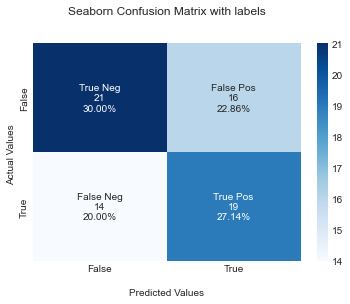

In [76]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.5716625716625716


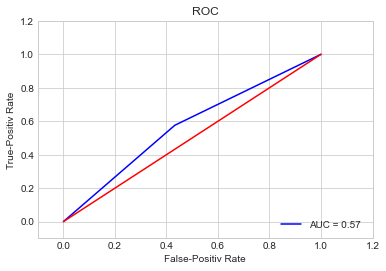

In [77]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.1.2 Logistic Regression with cross validation

In [78]:
# Create a Logistic Regression model
lrcv = LogisticRegressionCV(solver='liblinear')
lrcv.fit(X_train,y_train)

LogisticRegressionCV(solver='liblinear')

In [79]:
# Evaluate Logistic Regression
pred_train = lrcv.predict(X_train)
pred_test = lrcv.predict(X_test)

In [80]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.5833
Accuracy score Test: 0.5714
Precision score Test: 0.5758
Recall score Test: 0.5429
F1 Score Test: 0.5588


[[21 16]
 [14 19]]


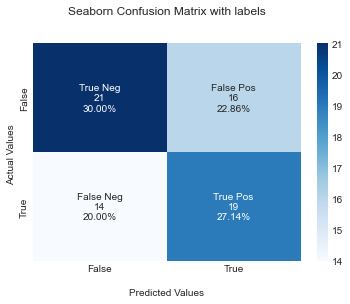

In [81]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.5716625716625716


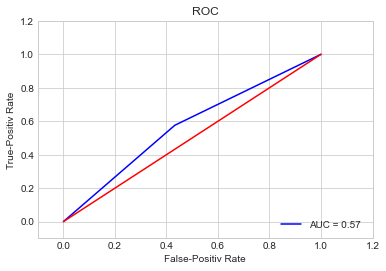

In [82]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.1.3 Feature importance

In [83]:
lrl_cv_coef = lrl.coef_[0]

<AxesSubplot:ylabel='features'>

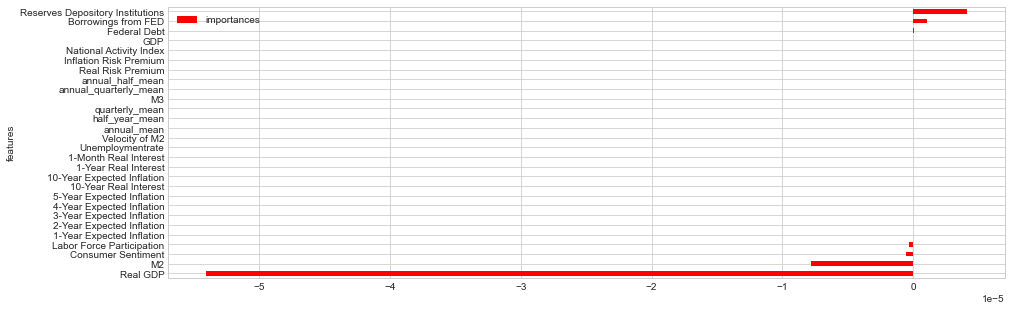

In [84]:
cols = X_train.columns
# Derive feature importance from Logistic Regression solver liblinear
importances = lrl_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

In [85]:
lrcv_cv_coef = lrcv.coef_[0]

<AxesSubplot:ylabel='features'>

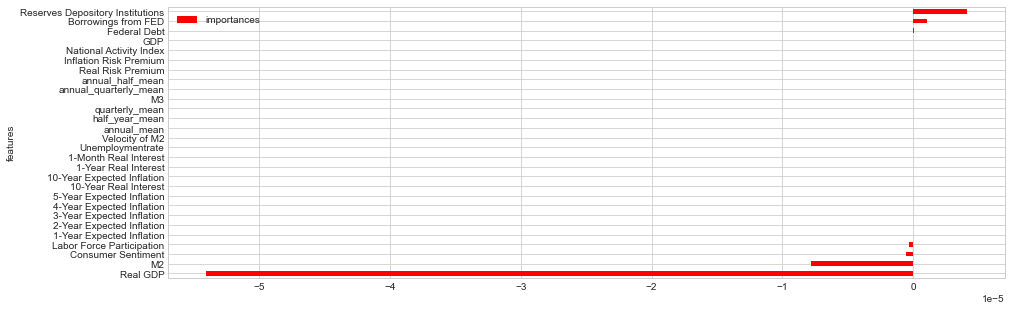

In [86]:
cols = X_train.columns
# Derive feature importance from Logistic Regression cross validation
importances = lrcv_cv_coef
indices     = np.argsort(importances)[::-1]

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 4.2 Random Forest

#### 4.2.1 Random Forest with depth 100

In [87]:
# Create Random Forest 
rf100 = RandomForestClassifier(max_depth=100)
rf100.fit(X_train,y_train)

RandomForestClassifier(max_depth=100)

In [88]:
# Evaluate Random Forest
pred_train = rf100.predict(X_train)
pred_test = rf100.predict(X_test)

In [89]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Train:", np.round(precision_score(pred_train, y_train), 4))
print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Train:", np.round(recall_score(pred_train, y_train), 4))
print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_train, y_train), 4))
print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.7143
Precision score Train: 1.0
Precision score Test: 0.6364
Recall score Train: 1.0
Recall score Test: 0.7241
F1 Score Test: 1.0
F1 Score Test: 0.6774


[[29  8]
 [12 21]]


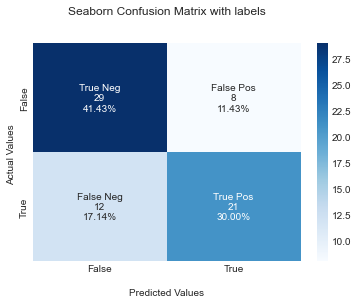

In [90]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.71007371007371


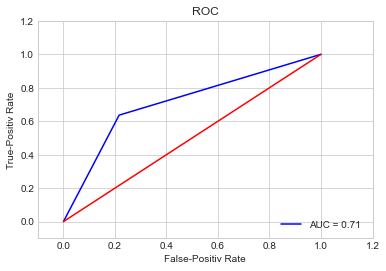

In [91]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.2.2 Random Forest with depth 500

In [92]:
# Create Random Forest  
rf500 = RandomForestClassifier(max_depth =500)
rf500.fit(X_train,y_train)

RandomForestClassifier(max_depth=500)

In [93]:
# Evaluate Random Forest
pred_train = rf500.predict(X_train)
pred_test = rf500.predict(X_test)

In [94]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.7714
Precision score Test: 0.6667
Recall score Test: 0.8148
F1 Score Test: 0.7333


[[32  5]
 [11 22]]


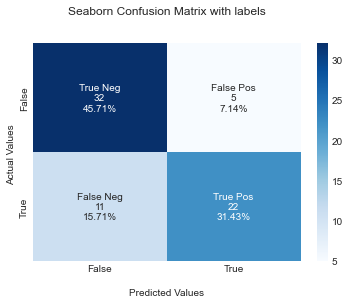

In [95]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.7657657657657657


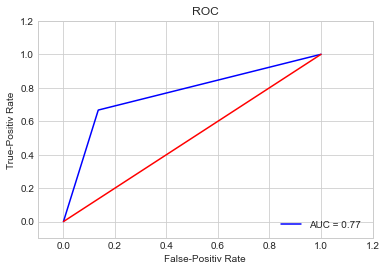

In [96]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.2.3 Random Forest with depth 1000

In [97]:
# Create Random Forest 
rf1000 = RandomForestClassifier(max_depth =1000)
rf1000.fit(X_train,y_train)

RandomForestClassifier(max_depth=1000)

In [98]:
# Evaluate Random Forest
pred_train = rf1000.predict(X_train)
pred_test = rf1000.predict(X_test)

In [99]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.7571
Precision score Test: 0.6364
Recall score Test: 0.8077
F1 Score Test: 0.7119


[[32  5]
 [12 21]]


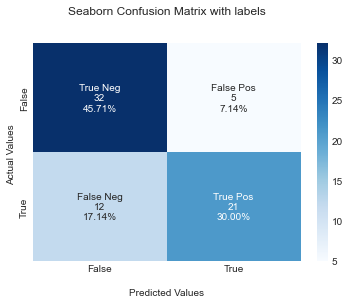

In [100]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.7506142506142506


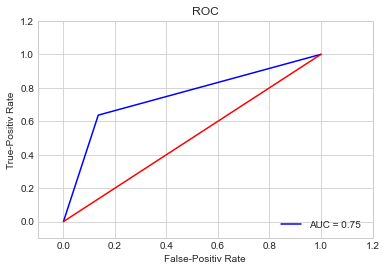

In [101]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.2.4 Feature importance

In [102]:
cols = X_train.columns

<AxesSubplot:ylabel='features'>

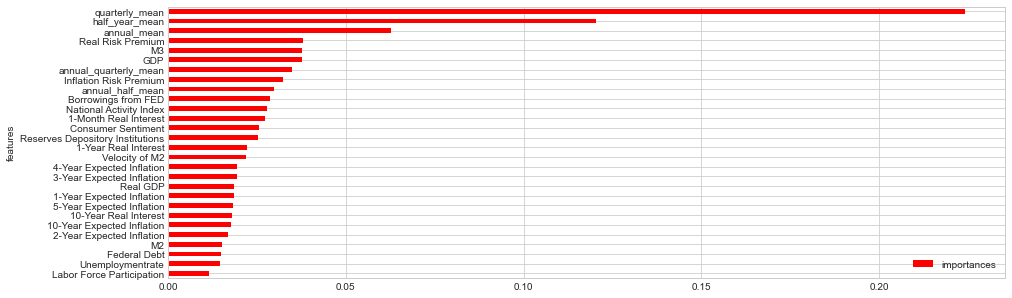

In [103]:
# Derive feature importance from Random Forest wit 100 trees
importances = rf100.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf100.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

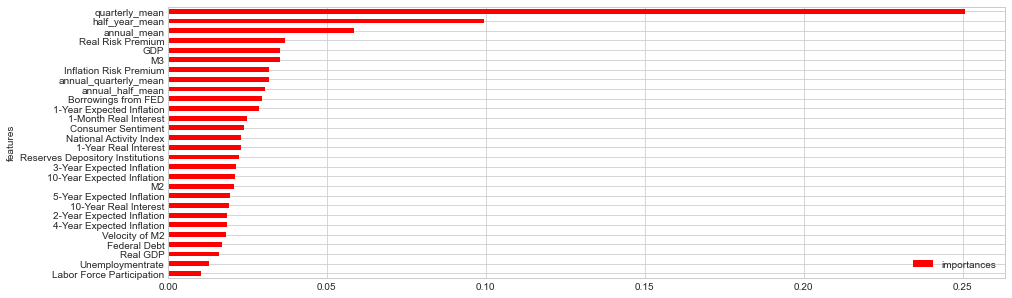

In [104]:
# Derive feature importance from Random Forest wit 500 trees
importances = rf500.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf500.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

<AxesSubplot:ylabel='features'>

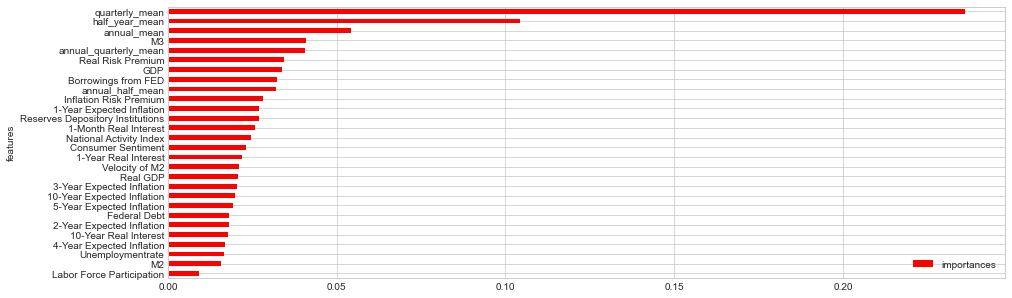

In [105]:
# Derive feature importance from Random Forest wit 1000 trees
importances = rf1000.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf1000.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]


# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

### 4.3 Neural Network

In [106]:
# Create Neural Network model
nn = make_pipeline(StandardScaler(), MLPClassifier()) 
nn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier())])

In [107]:
# Evaluate Neural Network
pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

In [108]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.9094
Accuracy score Test: 0.7429
Precision score Test: 0.6061
Recall score Test: 0.8
F1 Score Test: 0.6897


[[32  5]
 [13 20]]


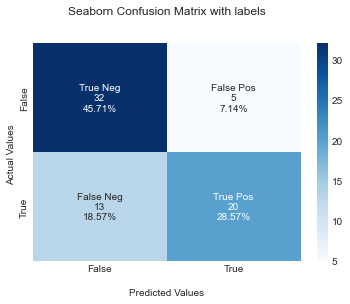

In [109]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.7354627354627354


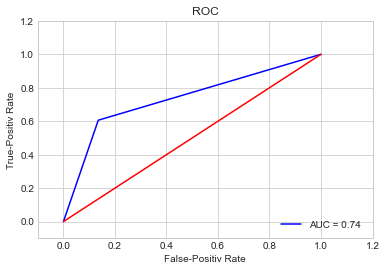

In [110]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

### 4.4 XGBoost

#### 4.4.1 XGBoost with 10 boosting rounds

In [111]:
# Create XGBoost model
XGB10 = xgb.XGBClassifier(n_estimators=10)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
XGB10.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = XGB10.evals_result()

[0]	validation_0-error:0.09783	validation_1-error:0.20000
[1]	validation_0-error:0.09058	validation_1-error:0.17143
[2]	validation_0-error:0.06884	validation_1-error:0.22857
[3]	validation_0-error:0.04710	validation_1-error:0.17143
[4]	validation_0-error:0.03986	validation_1-error:0.18571
[5]	validation_0-error:0.03986	validation_1-error:0.18571
[6]	validation_0-error:0.03261	validation_1-error:0.18571
[7]	validation_0-error:0.02536	validation_1-error:0.18571
[8]	validation_0-error:0.02174	validation_1-error:0.17143
[9]	validation_0-error:0.01087	validation_1-error:0.17143


In [112]:
# Evaluate XGBoost
pred_train = XGB10.predict(X_train)
pred_test = XGB10.predict(X_test)

In [113]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 0.9891
Accuracy score Test: 0.8286
Precision score Test: 0.7576
Recall score Test: 0.8621
F1 Score Test: 0.8065


[[33  4]
 [ 8 25]]


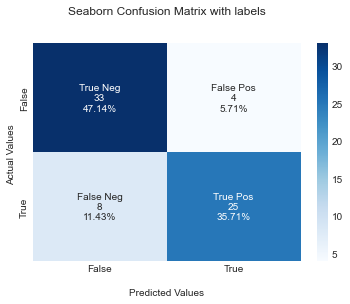

In [114]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.8247338247338247


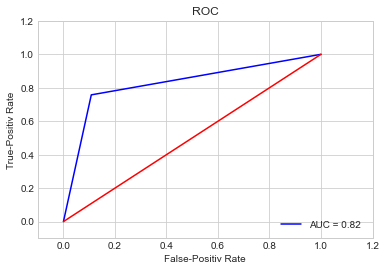

In [115]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.4.2 XGBoost with 50 boosting rounds

In [116]:
# Create XGBoost model
XGB50 = xgb.XGBClassifier(n_estimators=50)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
XGB50.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = XGB50.evals_result()

[0]	validation_0-error:0.09783	validation_1-error:0.20000
[1]	validation_0-error:0.09058	validation_1-error:0.17143
[2]	validation_0-error:0.06884	validation_1-error:0.22857
[3]	validation_0-error:0.04710	validation_1-error:0.17143
[4]	validation_0-error:0.03986	validation_1-error:0.18571
[5]	validation_0-error:0.03986	validation_1-error:0.18571
[6]	validation_0-error:0.03261	validation_1-error:0.18571
[7]	validation_0-error:0.02536	validation_1-error:0.18571
[8]	validation_0-error:0.02174	validation_1-error:0.17143
[9]	validation_0-error:0.01087	validation_1-error:0.17143
[10]	validation_0-error:0.00725	validation_1-error:0.17143
[11]	validation_0-error:0.00725	validation_1-error:0.17143
[12]	validation_0-error:0.00725	validation_1-error:0.17143
[13]	validation_0-error:0.00362	validation_1-error:0.17143
[14]	validation_0-error:0.00000	validation_1-error:0.17143
[15]	validation_0-error:0.00000	validation_1-error:0.15714
[16]	validation_0-error:0.00000	validation_1-error:0.15714
[17]	va

In [117]:
# Evaluate XGBoost
pred_train = XGB50.predict(X_train)
pred_test = XGB50.predict(X_test)

In [118]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.8143
Precision score Test: 0.7273
Recall score Test: 0.8571
F1 Score Test: 0.7869


[[33  4]
 [ 9 24]]


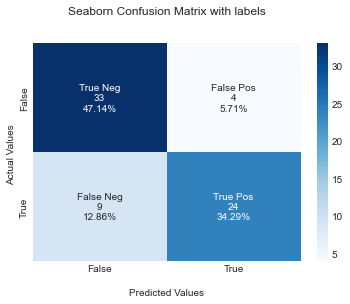

In [119]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.8095823095823096


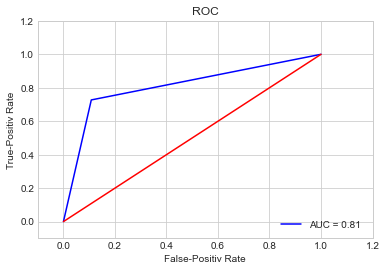

In [120]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.4.3 XGBoost with 100 boosting rounds

In [121]:
# Create XGBoost model
XGB100 = xgb.XGBClassifier(n_estimators=100)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
XGB100.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = XGB100.evals_result()

[0]	validation_0-error:0.09783	validation_1-error:0.20000
[1]	validation_0-error:0.09058	validation_1-error:0.17143
[2]	validation_0-error:0.06884	validation_1-error:0.22857
[3]	validation_0-error:0.04710	validation_1-error:0.17143
[4]	validation_0-error:0.03986	validation_1-error:0.18571
[5]	validation_0-error:0.03986	validation_1-error:0.18571
[6]	validation_0-error:0.03261	validation_1-error:0.18571
[7]	validation_0-error:0.02536	validation_1-error:0.18571
[8]	validation_0-error:0.02174	validation_1-error:0.17143
[9]	validation_0-error:0.01087	validation_1-error:0.17143
[10]	validation_0-error:0.00725	validation_1-error:0.17143
[11]	validation_0-error:0.00725	validation_1-error:0.17143
[12]	validation_0-error:0.00725	validation_1-error:0.17143
[13]	validation_0-error:0.00362	validation_1-error:0.17143
[14]	validation_0-error:0.00000	validation_1-error:0.17143
[15]	validation_0-error:0.00000	validation_1-error:0.15714
[16]	validation_0-error:0.00000	validation_1-error:0.15714
[17]	va

In [122]:
# Evaluate XGBoost
pred_train = XGB100.predict(X_train)
pred_test = XGB100.predict(X_test)

In [123]:
# Calculate metrics
print("Accuracy score Train:", np.round(accuracy_score(pred_train, y_train),4))
print("Accuracy score Test:", np.round(accuracy_score(pred_test, y_test),4))

print("Precision score Test:", np.round(precision_score(pred_test, y_test), 4))

print("Recall score Test:", np.round(recall_score(pred_test, y_test), 4))

print("F1 Score Test:", np.round(f1_score(pred_test, y_test),4))

Accuracy score Train: 1.0
Accuracy score Test: 0.8143
Precision score Test: 0.7273
Recall score Test: 0.8571
F1 Score Test: 0.7869


[[33  4]
 [ 9 24]]


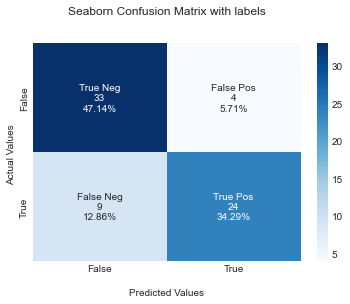

In [124]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

0.8095823095823096


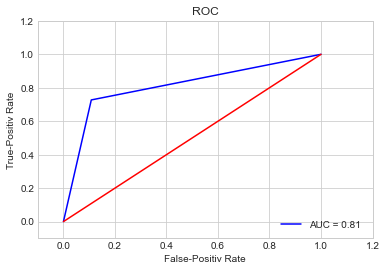

In [125]:
# Calculating the AUC and plotting the ROC curve
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test , pred_test)
roc_auc = auc(false_positive_rate , true_positive_rate) 
print(roc_auc)

#Show ROC
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate ,'b' , label='AUC = %0.2f '% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0 ,1] ,[0 ,1] , 'r') 
plt.xlim([ -0.1 ,1.2])
plt.ylim ([ -0.1 ,1.2])
plt.ylabel('True-Positiv Rate')
plt.xlabel('False-Positiv Rate')
#plt.savefig('roc2.png', dpi=500) 
plt.show()

#### 4.4.4 Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

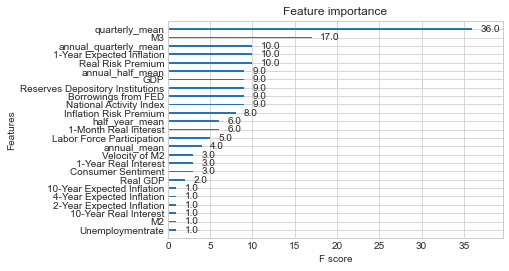

In [126]:
# Derive feature importance from XGBoost wit 10 boosting rounds
xgb.plot_importance(XGB10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

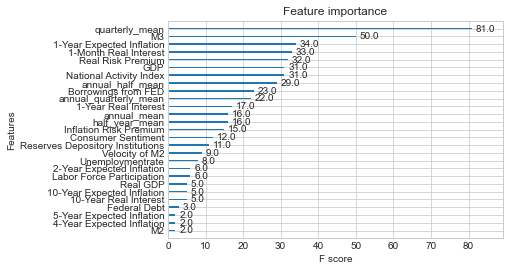

In [127]:
# Derive feature importance from XGBoost wit 50 boosting rounds
xgb.plot_importance(XGB50)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

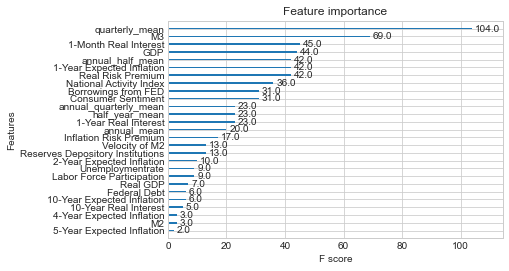

In [128]:
# Derive feature importance from XGBoost wit 100 boosting rounds
xgb.plot_importance(XGB100)

### 4.5 Pipeline

In [129]:
# Name of all the models
models = [
    ('Logistic Regression, solver = liblinear', lrl),
    ('Logistic Regression CV, solver = liblinear', lrcv),
    ('Random Forest, depth = 100', rf100),
    ('Random Forest, depth = 500', rf500),
    ('Random Forest, depth = 1000', rf1000),
    ('Neural Network', nn),
    ('XGBoost, boosting rounds = 10', XGB10),
    ('XGBoost, boosting rounds = 50', XGB50),
    ('XGBoost, boosting rounds = 100', XGB100),]

In [130]:
for name, model in models:
    pipelined_model = Pipeline([ 
                                 (name, model)
                            ])
    
    # Train the model
    pipelined_model.fit(X_train, y_train)

    # Predict the model
    y_hat = pipelined_model.predict(X_test)

    # Calculate metrics
    Precision = precision_score(y_test, y_hat)
    Recall = recall_score(y_test, y_hat)
    F1 = f1_score(y_test, y_hat)
    train = pipelined_model.score(X_train, y_train)
    test = pipelined_model.score(X_test, y_test)
    print('Model: ', name, ' | Train: ', train)
    print('Model: ', name, ' | Test: ', test)
    print('Model: ', name, ' | Precision: ', Precision)
    print('Model: ', name, ' | Recall: ', Recall)
    print('Model: ', name, ' | F1: ', F1)
    print('----------------')

Model:  Logistic Regression, solver = liblinear  | Train:  0.5833333333333334
Model:  Logistic Regression, solver = liblinear  | Test:  0.5714285714285714
Model:  Logistic Regression, solver = liblinear  | Precision:  0.5428571428571428
Model:  Logistic Regression, solver = liblinear  | Recall:  0.5757575757575758
Model:  Logistic Regression, solver = liblinear  | F1:  0.5588235294117646
----------------
Model:  Logistic Regression CV, solver = liblinear  | Train:  0.5833333333333334
Model:  Logistic Regression CV, solver = liblinear  | Test:  0.5714285714285714
Model:  Logistic Regression CV, solver = liblinear  | Precision:  0.5428571428571428
Model:  Logistic Regression CV, solver = liblinear  | Recall:  0.5757575757575758
Model:  Logistic Regression CV, solver = liblinear  | F1:  0.5588235294117646
----------------
Model:  Random Forest, depth = 100  | Train:  1.0
Model:  Random Forest, depth = 100  | Test:  0.8142857142857143
Model:  Random Forest, depth = 100  | Precision:  0.857